In [ ]:
pip install pyLDAvis==3.4.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 20.8 MB/s eta 0:00:00


In [ ]:
!pip install scikit-learn
from sklearn.datasets import fetch_20newsgroups # import the function from the correct module

newsgroups = fetch_20newsgroups(subset='all', categories=['sci.space', 'rec.sport.baseball', 'comp.graphics', 'talk.politics.mideast'])
documents = newsgroups.data

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove stopwords and lemmatize
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

preprocessed_documents = [preprocess(doc) for doc in documents]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary([doc.split() for doc in preprocessed_documents])
# Convert the document into a bag-of-words format
corpus = [dictionary.doc2bow(doc.split()) for doc in preprocessed_documents]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# Print the topics
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.009*"israel" + 0.007*"israeli" + 0.007*"people" + 0.007*"jew"')
(1, '0.011*"point" + 0.009*"line" + 0.004*"subject" + 0.004*"organization"')
(2, '0.009*"one" + 0.008*"said" + 0.008*"game" + 0.007*"people"')
(3, '0.010*"year" + 0.008*"writes" + 0.008*"line" + 0.008*"subject"')
(4, '0.017*"image" + 0.013*"data" + 0.007*"available" + 0.007*"system"')
(5, '0.014*"image" + 0.012*"file" + 0.012*"line" + 0.010*"subject"')
(6, '0.032*"armenian" + 0.013*"turkish" + 0.009*"turk" + 0.009*"serdar"')
(7, '0.014*"subject" + 0.014*"line" + 0.013*"organization" + 0.012*"writes"')
(8, '0.017*"space" + 0.007*"mission" + 0.006*"earth" + 0.006*"satellite"')
(9, '0.009*"organization" + 0.009*"subject" + 0.008*"line" + 0.007*"university"')


In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Get the number of topics
num_topics = lda_model.num_topics

# Initialize a list to hold topic distributions for each document
topic_vectors = []

# For each document, get the topic distribution
for doc in corpus:
    doc_topics = lda_model.get_document_topics(doc, minimum_probability=0.0)  # Ensure all topics are included
    doc_vector = np.zeros(num_topics)
    for topic_num, topic_val in doc_topics:
        doc_vector[topic_num] = topic_val  # Fill in the topic vector
    topic_vectors.append(doc_vector)

# Convert the list to a NumPy array
topic_vectors = np.array(topic_vectors)

# Calculate cosine similarity between the topic vectors
similarity_matrix = cosine_similarity(topic_vectors)

# Example: Print similarity between document 0 and others
print(similarity_matrix[0])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[1.         0.79465096 0.7941327  ... 0.58967178 0.00506523 0.50107451]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


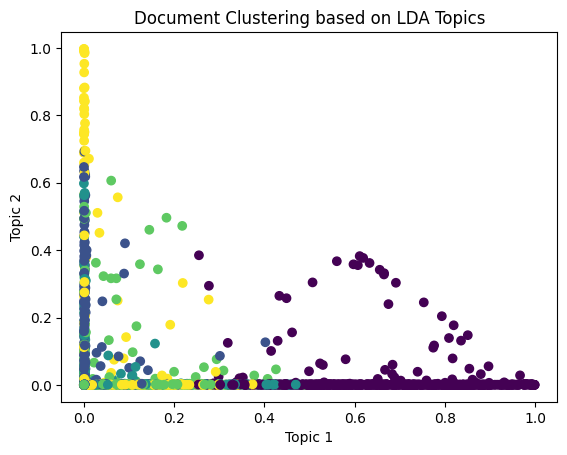

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform KMeans clustering on the document vectors
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
km.fit(similarity_matrix)

# Visualize the clusters
plt.scatter(topic_vectors[:, 0], topic_vectors[:, 1], c=km.labels_, cmap='viridis')
plt.xlabel('Topic 1')
plt.ylabel('Topic 2')
plt.title('Document Clustering based on LDA Topics')
plt.show()

In [ ]:
# Tokenize the documents
tokenized_docs = [doc.split() for doc in preprocessed_documents]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim.models import Word2Vec
# Train Word2Vec model on your corpus
word2vec_model = Word2Vec(sentences=tokenized_docs, vector_size=100, window=5, min_count=2, workers=4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def document_vector(doc):
    # Remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.wv]
    # If the document is not empty, compute the mean of the word vectors
    if len(doc) > 0:
        return np.mean(word2vec_model.wv[doc], axis=0)
    else:
        return np.zeros(100)  # Return a zero vector if the document is empty after removing out-of-vocab words

# Create document vectors for each document
doc_vectors = np.array([document_vector(doc) for doc in tokenized_docs])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Compute the cosine similarity matrix
similarity_matrix = cosine_similarity(doc_vectors)

# Example: Print similarity between document 0 and others
print(similarity_matrix[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.9999998  0.74917793 0.7509521  ... 0.9730025  0.8930221  0.8637826 ]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


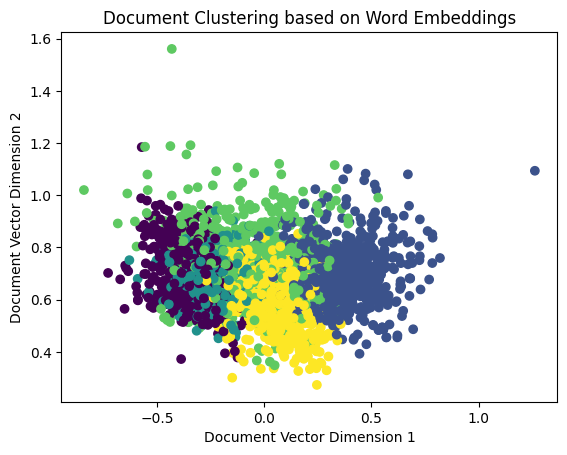

In [ ]:
# Perform KMeans clustering on the document vectors
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
km.fit(doc_vectors)

# Visualize the clusters
plt.scatter(doc_vectors[:, 0], doc_vectors[:, 1], c=km.labels_, cmap='viridis')
plt.xlabel('Document Vector Dimension 1')
plt.ylabel('Document Vector Dimension 2')
plt.title('Document Clustering based on Word Embeddings')
plt.show()